In [27]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import tensorflow as tf
print("num GPUs available:", len(tf.config.experimental.list_physical_devices("GPU")))
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler




# 设置中文字体（Windows系统使用SimHei，Mac使用Arial Unicode MS）
plt.rcParams['font.sans-serif'] = ['SimHei']  # 或者 ['Arial Unicode MS'] for Mac
plt.rcParams['axes.unicode_minus'] = False
file_path = 'stocks.xls'



num GPUs available: 0


In [28]:
# 读取 Excel 文件
df = pd.read_excel(file_path)

print(df.head())

        code    pubDate   statDate  currentRatio  quickRatio  cashRatio  \
0  sh.600000 2010-04-30 2010-03-31           NaN         NaN        NaN   
1  sh.600000 2010-08-30 2010-06-30           NaN         NaN        NaN   
2  sh.600000 2010-10-29 2010-09-30           NaN         NaN        NaN   
3  sh.600000 2011-03-30 2010-12-31           NaN         NaN        NaN   
4  sh.600000 2011-04-28 2011-03-31           NaN         NaN        NaN   

   YOYLiability  liabilityToAsset  assetToEquity  YOYEquity  ...  \
0      0.092155          0.956462      22.968189   0.604597  ...   
1      0.084297          0.957296      23.416792   0.621123  ...   
2      0.244137          0.958589      24.147939   0.254743  ...   
3      0.330304          0.943744      17.775904   0.810020  ...   
4      0.347031          0.942993      17.541658   0.787413  ...   

   INVTurnRatio  INVTurnDays  CATurnRatio  AssetTurnRatio    roeAvg  npMargin  \
0           NaN          NaN          NaN        0.006531  

In [29]:
df

,code,pubDate,statDate,currentRatio,quickRatio,cashRatio,YOYLiability,liabilityToAsset,assetToEquity,YOYEquity,...,INVTurnRatio,INVTurnDays,CATurnRatio,AssetTurnRatio,roeAvg,npMargin,netProfit,epsTTM,totalShare,liqaShare
0,sh.600000,2010-04-30,2010-03-31,NaN,NaN,NaN,0.092155,0.956462,22.968189,0.604597,...,NaN,NaN,NaN,0.006531,0.058590,0.382771,4.104843e+09,1.626508,8.830046e+09,7.925887e+09
1,sh.600000,2010-08-30,2010-06-30,NaN,NaN,NaN,0.084297,0.957296,23.416792,0.621123,...,NaN,NaN,NaN,0.013368,0.126266,0.399208,9.082586e+09,1.351734,1.147906e+10,1.030365e+10
2,sh.600000,2010-10-29,2010-09-30,NaN,NaN,NaN,0.244137,0.958589,24.147939,0.254743,...,NaN,NaN,NaN,0.019949,0.198420,0.413615,1.484537e+10,1.547490,1.147906e+10,1.147906e+10
3,sh.600000,2011-03-30,2010-12-31,NaN,NaN,NaN,0.330304,0.943744,17.775904,0.810020,...,NaN,NaN,NaN,0.026143,0.200862,0.384681,1.917859e+10,1.336501,1.434882e+10,1.147906e+10
4,sh.600000,2011-04-28,2011-03-31,NaN,NaN,NaN,0.347031,0.942993,17.541658,0.787413,...,NaN,NaN,NaN,0.006812,0.048073,0.399709,6.073979e+09,1.472590,1.434882e+10,1.147906e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,sh.600117,2023-10-28,2023-09-30,0.403088,0.250685,0.010604,-0.159561,0.962925,26.972642,-3.758343,...,1.776194,152.009909,0.585610,0.213036,NaN,-0.430904,-1.423522e+09,-1.532698,1.045118e+09,1.045118e+09
5590,sh.600117,2024-03-20,2023-12-31,1.008720,0.585776,0.217713,-0.611256,0.450685,1.820450,7.260885,...,3.080821,116.852766,1.024264,0.320942,0.747730,0.253611,1.252610e+09,0.518000,3.255115e+09,3.255115e+09
5591,sh.600117,2024-04-30,2024-03-31,0.905940,0.461976,0.052949,-0.640229,0.443191,1.795948,5.710525,...,0.892018,100.896861,0.385295,0.084948,-0.036261,-0.210937,-2.451593e+08,0.535028,3.255115e+09,3.255115e+09
5592,sh.600117,2024-08-30,2024-06-30,0.851795,0.401523,0.076649,-0.587891,0.004462,1.805587,3.663950,...,2.034678,88.465130,0.909178,0.198682,-0.056235,-0.149996,-4.045823e+08,0.752539,3.255115e+09,3.255115e+09


## 缺失值填充

In [30]:
df = df.fillna(df.mean(numeric_only=True))

In [31]:
df

,code,pubDate,statDate,currentRatio,quickRatio,cashRatio,YOYLiability,liabilityToAsset,assetToEquity,YOYEquity,...,INVTurnRatio,INVTurnDays,CATurnRatio,AssetTurnRatio,roeAvg,npMargin,netProfit,epsTTM,totalShare,liqaShare
0,sh.600000,2010-04-30,2010-03-31,1.744580,1.210160,0.633894,0.092155,0.956462,22.968189,0.604597,...,29.630799,1504.398382,0.954780,0.006531,0.058590,0.382771,4.104843e+09,1.626508,8.830046e+09,7.925887e+09
1,sh.600000,2010-08-30,2010-06-30,1.744580,1.210160,0.633894,0.084297,0.957296,23.416792,0.621123,...,29.630799,1504.398382,0.954780,0.013368,0.126266,0.399208,9.082586e+09,1.351734,1.147906e+10,1.030365e+10
2,sh.600000,2010-10-29,2010-09-30,1.744580,1.210160,0.633894,0.244137,0.958589,24.147939,0.254743,...,29.630799,1504.398382,0.954780,0.019949,0.198420,0.413615,1.484537e+10,1.547490,1.147906e+10,1.147906e+10
3,sh.600000,2011-03-30,2010-12-31,1.744580,1.210160,0.633894,0.330304,0.943744,17.775904,0.810020,...,29.630799,1504.398382,0.954780,0.026143,0.200862,0.384681,1.917859e+10,1.336501,1.434882e+10,1.147906e+10
4,sh.600000,2011-04-28,2011-03-31,1.744580,1.210160,0.633894,0.347031,0.942993,17.541658,0.787413,...,29.630799,1504.398382,0.954780,0.006812,0.048073,0.399709,6.073979e+09,1.472590,1.434882e+10,1.147906e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,sh.600117,2023-10-28,2023-09-30,0.403088,0.250685,0.010604,-0.159561,0.962925,26.972642,-3.758343,...,1.776194,152.009909,0.585610,0.213036,0.008119,-0.430904,-1.423522e+09,-1.532698,1.045118e+09,1.045118e+09
5590,sh.600117,2024-03-20,2023-12-31,1.008720,0.585776,0.217713,-0.611256,0.450685,1.820450,7.260885,...,3.080821,116.852766,1.024264,0.320942,0.747730,0.253611,1.252610e+09,0.518000,3.255115e+09,3.255115e+09
5591,sh.600117,2024-04-30,2024-03-31,0.905940,0.461976,0.052949,-0.640229,0.443191,1.795948,5.710525,...,0.892018,100.896861,0.385295,0.084948,-0.036261,-0.210937,-2.451593e+08,0.535028,3.255115e+09,3.255115e+09
5592,sh.600117,2024-08-30,2024-06-30,0.851795,0.401523,0.076649,-0.587891,0.004462,1.805587,3.663950,...,2.034678,88.465130,0.909178,0.198682,-0.056235,-0.149996,-4.045823e+08,0.752539,3.255115e+09,3.255115e+09


In [32]:
# 智能对数转换函数
def smart_log_transform(df):
    # 自动识别数值型列
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    # 创建数据副本避免修改原始数据
    transformed_df = df.copy()
    
    # 记录转换日志
    transform_log = []
    
    for col in numeric_cols:
        # 计算列均值（自动跳过NaN）
        col_mean = transformed_df[col].mean()
        
        # 判断转换条件
        if col_mean > 1:
            # 处理非正值：将<=0的值替换为列最小正值/2
            min_positive = transformed_df[col][transformed_df[col] > 0].min()
            transformed_df[col] = transformed_df[col].apply(
                lambda x: np.log(x if x > 0 else min_positive/2)
            )
            transform_log.append(f"{col}: 均值{col_mean:.2f} -> 已转换")
        else:
            transform_log.append(f"{col}: 均值{col_mean:.2f} -> 未转换")
    
    # 打印转换日志
    print("列转换日志：")
    print("\n".join(transform_log))
    
    return transformed_df

# 执行转换
transformed_df = smart_log_transform(df)

# 显示结果对比
print("\n原始数据：")
print(df.head())
print("\n转换后数据：")
print(transformed_df.head())

列转换日志：
currentRatio: 均值1.74 -> 已转换
quickRatio: 均值1.21 -> 已转换
cashRatio: 均值0.63 -> 未转换
YOYLiability: 均值5.24 -> 已转换
liabilityToAsset: 均值0.57 -> 未转换
assetToEquity: 均值3.43 -> 已转换
YOYEquity: 均值1.01 -> 已转换
YOYAsset: 均值0.52 -> 未转换
NRTurnRatio: 均值26294.42 -> 已转换
NRTurnDays: 均值133.69 -> 已转换
INVTurnRatio: 均值29.63 -> 已转换
INVTurnDays: 均值1504.40 -> 已转换
CATurnRatio: 均值0.95 -> 未转换
AssetTurnRatio: 均值0.35 -> 未转换
roeAvg: 均值0.01 -> 未转换
npMargin: 均值-1.10 -> 未转换
netProfit: 均值2805439429.15 -> 已转换
epsTTM: 均值0.39 -> 未转换
totalShare: 均值5549220809.09 -> 已转换
liqaShare: 均值4627179334.76 -> 已转换

原始数据：
        code    pubDate   statDate  currentRatio  quickRatio  cashRatio  \
0  sh.600000 2010-04-30 2010-03-31       1.74458     1.21016   0.633894   
1  sh.600000 2010-08-30 2010-06-30       1.74458     1.21016   0.633894   
2  sh.600000 2010-10-29 2010-09-30       1.74458     1.21016   0.633894   
3  sh.600000 2011-03-30 2010-12-31       1.74458     1.21016   0.633894   
4  sh.600000 2011-04-28 2011-03-31       1.7445

In [33]:
transformed_df

,code,pubDate,statDate,currentRatio,quickRatio,cashRatio,YOYLiability,liabilityToAsset,assetToEquity,YOYEquity,...,INVTurnRatio,INVTurnDays,CATurnRatio,AssetTurnRatio,roeAvg,npMargin,netProfit,epsTTM,totalShare,liqaShare
0,sh.600000,2010-04-30,2010-03-31,0.556514,0.190753,0.633894,-2.384283,0.956462,3.134110,-0.503193,...,3.388814,7.316148,0.954780,0.006531,0.058590,0.382771,22.135433,1.626508,22.901426,22.793400
1,sh.600000,2010-08-30,2010-06-30,0.556514,0.190753,0.633894,-2.473409,0.957296,3.153453,-0.476226,...,3.388814,7.316148,0.954780,0.013368,0.126266,0.399208,22.929625,1.351734,23.163790,23.055764
2,sh.600000,2010-10-29,2010-09-30,0.556514,0.190753,0.633894,-1.410026,0.958589,3.184199,-1.367500,...,3.388814,7.316148,0.954780,0.019949,0.198420,0.413615,23.420954,1.547490,23.163790,23.163790
3,sh.600000,2011-03-30,2010-12-31,0.556514,0.190753,0.633894,-1.107742,0.943744,2.877844,-0.210696,...,3.388814,7.316148,0.954780,0.026143,0.200862,0.384681,23.677060,1.336501,23.386934,23.163790
4,sh.600000,2011-04-28,2011-03-31,0.556514,0.190753,0.633894,-1.058341,0.942993,2.864579,-0.239002,...,3.388814,7.316148,0.954780,0.006812,0.048073,0.399709,22.527280,1.472590,23.386934,23.163790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5589,sh.600117,2023-10-28,2023-09-30,-0.908600,-1.383558,0.010604,-9.256384,0.962925,3.294823,-11.212821,...,0.574473,5.023946,0.585610,0.213036,0.008119,-0.430904,8.664978,-1.532698,20.767396,20.767396
5590,sh.600117,2024-03-20,2023-12-31,0.008682,-0.534818,0.217713,-9.256384,0.450685,0.599084,1.982502,...,1.125196,4.760915,1.024264,0.320942,0.747730,0.253611,20.948495,0.518000,21.903493,21.903493
5591,sh.600117,2024-04-30,2024-03-31,-0.098782,-0.772242,0.052949,-9.256384,0.443191,0.585533,1.742311,...,-0.114269,4.614099,0.385295,0.084948,-0.036261,-0.210937,8.664978,0.535028,21.903493,21.903493
5592,sh.600117,2024-08-30,2024-06-30,-0.160409,-0.912490,0.076649,-9.256384,0.004462,0.590886,1.298542,...,0.710338,4.482608,0.909178,0.198682,-0.056235,-0.149996,8.664978,0.752539,21.903493,21.903493


In [34]:
# 定义需要保留的主键字段
key_columns = ['code', 'pubDate', 'statDate']

# 获取需要检查重复的列（所有列排除主键）
columns_to_check = transformed_df.columns.difference(key_columns)

# 删除重复数据（保留第一个出现的记录）
dedup_df = transformed_df.drop_duplicates(
    subset=columns_to_check,
    keep='first'
)

# 显示处理结果对比
print(f"原始数据行数：{len(transformed_df)}")
print(f"去重后行数：{len(dedup_df)}")
print(f"删除重复行数：{len(transformed_df) - len(dedup_df)}")

原始数据行数：5594
去重后行数：5594
删除重复行数：0


In [35]:
import pandas as pd

# 转换日期列（确保已转换为datetime类型）
df['statDate'] = pd.to_datetime(df['statDate'])
df['pubDate'] = pd.to_datetime(df['pubDate'])

# 提取年份用于分组
df['year'] = df['statDate'].dt.year

# 按企业和年份分组，保留最新statDate的记录
cleaned_df = (
    df.sort_values(['code', 'statDate'], ascending=[True, False])
    .groupby(['code', 'year'])
    .head(1)
    .sort_index()
    .drop(columns=['year'])  # 移除临时年份列
)

# 验证结果示例
print("原始数据量:", len(df))
print("清洗后数据量:", len(cleaned_df))
print("示例保留数据：")
print(cleaned_df[['code', 'statDate', 'pubDate']].head())

原始数据量: 5594
清洗后数据量: 1430
示例保留数据：
         code   statDate    pubDate
3   sh.600000 2010-12-31 2011-03-30
7   sh.600000 2011-12-31 2012-03-16
11  sh.600000 2012-12-31 2013-03-14
15  sh.600000 2013-12-31 2014-03-20
19  sh.600000 2014-12-31 2015-03-19


In [36]:
df = cleaned_df
df

,code,pubDate,statDate,currentRatio,quickRatio,cashRatio,YOYLiability,liabilityToAsset,assetToEquity,YOYEquity,...,INVTurnRatio,INVTurnDays,CATurnRatio,AssetTurnRatio,roeAvg,npMargin,netProfit,epsTTM,totalShare,liqaShare
3,sh.600000,2011-03-30,2010-12-31,1.744580,1.210160,0.633894,0.330304,0.943744,17.775904,0.810020,...,29.630799,1504.398382,0.954780,0.026143,0.200862,0.384681,1.917859e+10,1.336501,1.434882e+10,1.147906e+10
7,sh.600000,2012-03-16,2011-12-31,1.744580,1.210160,0.633894,0.225817,0.944298,17.952680,0.210534,...,29.630799,1504.398382,0.954780,0.027857,0.200715,0.402769,2.735511e+10,1.462783,1.865347e+10,1.492278e+10
11,sh.600000,2013-03-14,2012-12-31,1.744580,1.210160,0.633894,0.169969,0.942888,17.509320,0.192135,...,29.630799,1504.398382,0.954780,0.028455,0.209481,0.413625,3.431100e+10,1.832688,1.865347e+10,1.492278e+10
15,sh.600000,2014-03-20,2013-12-31,1.744580,1.210160,0.633894,0.170884,0.943690,17.758907,0.151428,...,29.630799,1504.398382,0.954780,0.029305,0.214323,0.411938,4.120000e+10,2.193801,1.865347e+10,1.492278e+10
19,sh.600000,2015-03-19,2014-12-31,1.744580,1.210160,0.633894,0.132380,0.937252,15.936814,0.272998,...,29.630799,1504.398382,0.954780,0.031280,0.202461,0.384475,4.736000e+10,2.521032,1.865347e+10,1.492278e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,sh.600117,2021-04-28,2020-12-31,0.508480,0.327213,0.125361,-0.035947,0.758310,4.137533,0.057494,...,3.668094,98.143609,1.449869,0.485621,0.041970,0.010746,1.082746e+08,0.056584,1.045118e+09,1.045118e+09
5582,sh.600117,2022-04-30,2021-12-31,0.547786,0.382943,0.080600,0.051655,0.881953,8.471187,-0.805987,...,4.757587,75.668606,1.699979,0.626938,-1.328309,-0.218077,-2.666884e+09,-1.099021,1.045118e+09,1.045118e+09
5586,sh.600117,2023-04-29,2022-12-31,0.434834,0.295190,0.084149,-0.007701,0.966484,29.836459,-3.915592,...,3.629993,99.173554,1.115818,0.439373,0.008119,-0.209574,-1.625718e+09,-1.101002,1.045118e+09,1.045118e+09
5590,sh.600117,2024-03-20,2023-12-31,1.008720,0.585776,0.217713,-0.611256,0.450685,1.820450,7.260885,...,3.080821,116.852766,1.024264,0.320942,0.747730,0.253611,1.252610e+09,0.518000,3.255115e+09,3.255115e+09


## 上市公司企业绩效相对贴近度比较分析

In [37]:
# 定义指标列
indicators = [
    'currentRatio', 'quickRatio', 'cashRatio', 'YOYLiability', 'liabilityToAsset',
    'assetToEquity', 'YOYEquity', 'INVTurnRatio', 'INVTurnDays', 'CATurnRatio',
    'AssetTurnRatio', 'roeAvg', 'npMargin', 'netProfit', 'epsTTM', 'totalShare', 'liqaShare'
]

# 1. 数据标准化（最小-最大标准化）
df_normalized = (df[indicators] - df[indicators].min()) / (df[indicators].max() - df[indicators].min())

# 2. 熵权法计算权重
p = df_normalized / df_normalized.sum()
e = (-1 / np.log(len(df))) * (p * np.log(p)).sum()
g = 1 - e
w = g / g.sum()

# 3. 构建加权决策矩阵
weighted_matrix = df_normalized * w

# 4. 确定正理想解和负理想解
positive_ideal = weighted_matrix.max()
negative_ideal = weighted_matrix.min()

# 5. 计算欧氏距离
d_plus = np.sqrt(((weighted_matrix - positive_ideal) ** 2).sum(axis=1))
d_minus = np.sqrt(((weighted_matrix - negative_ideal) ** 2).sum(axis=1))

# 6. 计算相对贴近度
closeness = d_minus / (d_plus + d_minus)

# 7. 将结果添加到数据框
df['相对贴近度'] = closeness

# 8. 按股票分组，计算相对贴近度的均值
mean_closeness_by_stock = df.groupby('code')['相对贴近度'].mean()

# 打印结果
print("每个股票的相对贴近度均值:")
print(mean_closeness_by_stock)



每个股票的相对贴近度均值:
code
sh.600000    0.074240
sh.600004    0.014694
sh.600005    0.036720
sh.600006    0.014294
sh.600007    0.018639
               ...   
sh.600113    0.014021
sh.600114    0.013614
sh.600115    0.048413
sh.600116    0.012076
sh.600117    0.011521
Name: 相对贴近度, Length: 98, dtype: float64


In [38]:


# 假设原始数据已包含相对贴近度列
# df = ... (包含'code'和'相对贴近度'列的数据)

# 提取相对贴近度数据
X = df[['相对贴近度']].values

# K均值聚类（分为5类）
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_

# 将聚类标签映射到中文分类
# 根据聚类中心排序确定类别等级（中心值越大越好）
centers = kmeans.cluster_centers_.flatten()
sorted_indices = np.argsort(centers)[::-1]  # 降序排列

# 定义中文标签映射
label_map = {
    sorted_indices[0]: "很好",
    sorted_indices[1]: "好",
    sorted_indices[2]: "良好",
    sorted_indices[3]: "差",
    sorted_indices[4]: "很差"
}

# 创建中文分类列
df['分类'] = [label_map[label] for label in labels]

# 按分类排序展示结果
result = df[['code', '相对贴近度', '分类']].sort_values(by='相对贴近度', ascending=False)

print("分类结果示例：")
print(result.head())

# 各类别统计信息
print("\n分类分布统计：")
print(df['分类'].value_counts().sort_index(ascending=False))

# 保存结果
result.to_csv('股票分类结果.csv', index=False)

分类结果示例：
           code     相对贴近度  分类
2073  sh.600053  0.480872  很好
1490  sh.600035  0.417683  很好
4217  sh.600093  0.401296  很好
1231  sh.600028  0.275140   好
1227  sh.600028  0.275004   好

分类分布统计：
良好     101
很差    1041
很好       3
差      267
好       18
Name: 分类, dtype: int64


In [39]:
mean_closeness_by_stock

code
sh.600000    0.074240
sh.600004    0.014694
sh.600005    0.036720
sh.600006    0.014294
sh.600007    0.018639
               ...   
sh.600113    0.014021
sh.600114    0.013614
sh.600115    0.048413
sh.600116    0.012076
sh.600117    0.011521
Name: 相对贴近度, Length: 98, dtype: float64

In [40]:
df

,code,pubDate,statDate,currentRatio,quickRatio,cashRatio,YOYLiability,liabilityToAsset,assetToEquity,YOYEquity,...,CATurnRatio,AssetTurnRatio,roeAvg,npMargin,netProfit,epsTTM,totalShare,liqaShare,相对贴近度,分类
3,sh.600000,2011-03-30,2010-12-31,1.744580,1.210160,0.633894,0.330304,0.943744,17.775904,0.810020,...,0.954780,0.026143,0.200862,0.384681,1.917859e+10,1.336501,1.434882e+10,1.147906e+10,0.042557,差
7,sh.600000,2012-03-16,2011-12-31,1.744580,1.210160,0.633894,0.225817,0.944298,17.952680,0.210534,...,0.954780,0.027857,0.200715,0.402769,2.735511e+10,1.462783,1.865347e+10,1.492278e+10,0.053992,差
11,sh.600000,2013-03-14,2012-12-31,1.744580,1.210160,0.633894,0.169969,0.942888,17.509320,0.192135,...,0.954780,0.028455,0.209481,0.413625,3.431100e+10,1.832688,1.865347e+10,1.492278e+10,0.053993,差
15,sh.600000,2014-03-20,2013-12-31,1.744580,1.210160,0.633894,0.170884,0.943690,17.758907,0.151428,...,0.954780,0.029305,0.214323,0.411938,4.120000e+10,2.193801,1.865347e+10,1.492278e+10,0.054012,差
19,sh.600000,2015-03-19,2014-12-31,1.744580,1.210160,0.633894,0.132380,0.937252,15.936814,0.272998,...,0.954780,0.031280,0.202461,0.384475,4.736000e+10,2.521032,1.865347e+10,1.492278e+10,0.053986,差
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,sh.600117,2021-04-28,2020-12-31,0.508480,0.327213,0.125361,-0.035947,0.758310,4.137533,0.057494,...,1.449869,0.485621,0.041970,0.010746,1.082746e+08,0.056584,1.045118e+09,1.045118e+09,0.010162,很差
5582,sh.600117,2022-04-30,2021-12-31,0.547786,0.382943,0.080600,0.051655,0.881953,8.471187,-0.805987,...,1.699979,0.626938,-1.328309,-0.218077,-2.666884e+09,-1.099021,1.045118e+09,1.045118e+09,0.011963,很差
5586,sh.600117,2023-04-29,2022-12-31,0.434834,0.295190,0.084149,-0.007701,0.966484,29.836459,-3.915592,...,1.115818,0.439373,0.008119,-0.209574,-1.625718e+09,-1.101002,1.045118e+09,1.045118e+09,0.011568,很差
5590,sh.600117,2024-03-20,2023-12-31,1.008720,0.585776,0.217713,-0.611256,0.450685,1.820450,7.260885,...,1.024264,0.320942,0.747730,0.253611,1.252610e+09,0.518000,3.255115e+09,3.255115e+09,0.013059,很差


In [41]:
# 转换为DataFrame
df2 = pd.DataFrame(mean_closeness_by_stock).reset_index()
df2.columns = ['股票代码', '相对贴近度']

# K均值聚类
X = df2[['相对贴近度']].values  # 转换为二维数组
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_

# 根据聚类中心排序确定标签
centers = kmeans.cluster_centers_.flatten()
sorted_indices = np.argsort(centers)[::-1]  # 从高到低排序

# 创建中文标签映射
label_dict = {
    sorted_indices[0]: "很好",
    sorted_indices[1]: "好",
    sorted_indices[2]: "良好",
    sorted_indices[3]: "差",
    sorted_indices[4]: "很差"
}

# 添加分类结果
df2['分类'] = [label_dict[label] for label in labels]

# 按相对贴近度排序查看结果
result = df2.sort_values(by='相对贴近度', ascending=False)

print("股票分类结果：")
print(result.head(10))

print("\n分类分布统计：")
print(df2['分类'].value_counts().sort_index(ascending=False))

# 保存结果
result.to_csv('股票分类结果.csv', index=False)



股票分类结果：
         股票代码     相对贴近度  分类
21  sh.600028  0.262212  很好
11  sh.600016  0.102783   好
32  sh.600050  0.082167   好
7   sh.600010  0.080079   好
0   sh.600000  0.074240   好
35  sh.600053  0.073486   好
27  sh.600036  0.070143   好
13  sh.600018  0.068593   好
14  sh.600019  0.063742   好
39  sh.600057  0.055035  良好

分类分布统计：
良好     8
很差    61
很好     1
差     20
好      8
Name: 分类, dtype: int64


In [42]:
result

,股票代码,相对贴近度,分类
21,sh.600028,0.262212,很好
11,sh.600016,0.102783,好
32,sh.600050,0.082167,好
7,sh.600010,0.080079,好
0,sh.600000,0.074240,好
...,...,...,...
58,sh.600077,0.009619,很差
59,sh.600078,0.009241,很差
87,sh.600107,0.009050,很差
92,sh.600112,0.008164,很差


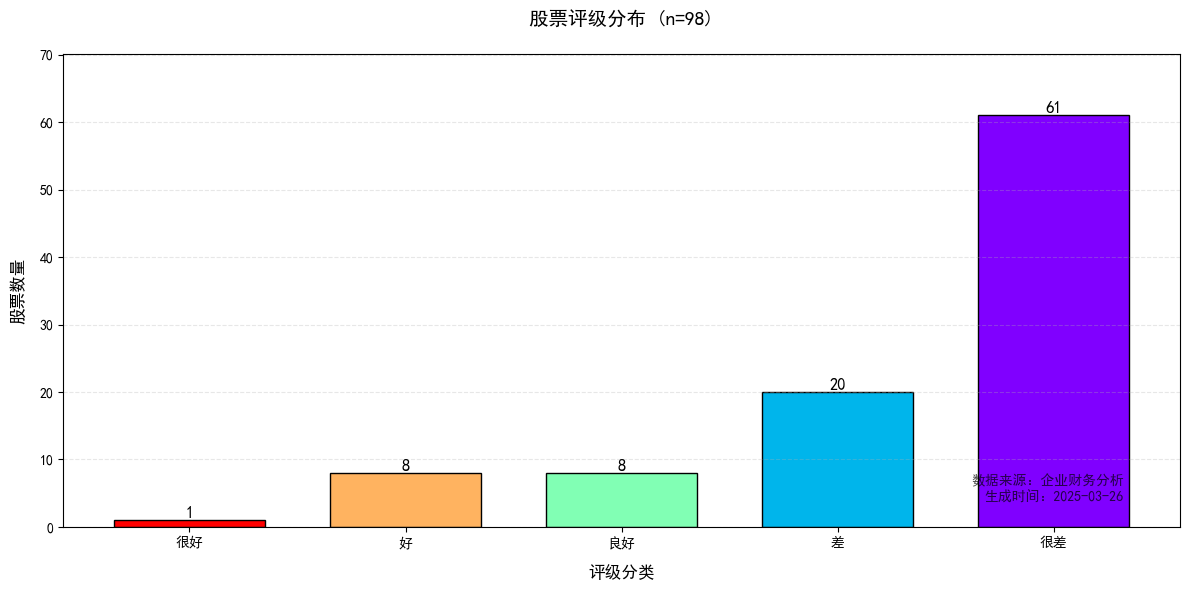

In [43]:


# 生成分类统计
category_counts = df2['分类'].value_counts().reindex(["很好", "好", "良好", "差", "很差"], fill_value=0)

# 创建颜色渐变（绿->黄->红）
colors = plt.cm.rainbow(np.linspace(0, 1, 5))[::-1]  # 反转颜色顺序

# 创建图表
plt.figure(figsize=(12, 6), dpi=100)

# 绘制柱状图
bars = plt.bar(
    category_counts.index,
    category_counts.values,
    color=colors,
    edgecolor='black',
    width=0.7
)

# 添加数据标签
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height}',
             ha='center', va='bottom',
             fontsize=12,
             fontweight='bold')

# 装饰图表
plt.title('股票评级分布 (n={})'.format(len(df2)), fontsize=14, pad=20)
plt.xlabel('评级分类', fontsize=12, labelpad=10)
plt.ylabel('股票数量', fontsize=12, labelpad=10)
plt.ylim(0, max(category_counts.values)*1.15)  # 自动调整Y轴范围
plt.grid(axis='y', alpha=0.3, linestyle='--')

# 添加注释说明
plt.annotate('数据来源：企业财务分析\n生成时间：{}'.format(pd.Timestamp.now().strftime('%Y-%m-%d')),
             xy=(0.95, 0.05), xycoords='axes fraction',
             ha='right', va='bottom',
             fontsize=10,
             alpha=0.7)

# 优化布局
plt.tight_layout()

# 保存高清图片
plt.savefig('stock_classification.png', dpi=300, bbox_inches='tight')

# 显示图表
plt.show()

In [44]:
df

,code,pubDate,statDate,currentRatio,quickRatio,cashRatio,YOYLiability,liabilityToAsset,assetToEquity,YOYEquity,...,CATurnRatio,AssetTurnRatio,roeAvg,npMargin,netProfit,epsTTM,totalShare,liqaShare,相对贴近度,分类
3,sh.600000,2011-03-30,2010-12-31,1.744580,1.210160,0.633894,0.330304,0.943744,17.775904,0.810020,...,0.954780,0.026143,0.200862,0.384681,1.917859e+10,1.336501,1.434882e+10,1.147906e+10,0.042557,差
7,sh.600000,2012-03-16,2011-12-31,1.744580,1.210160,0.633894,0.225817,0.944298,17.952680,0.210534,...,0.954780,0.027857,0.200715,0.402769,2.735511e+10,1.462783,1.865347e+10,1.492278e+10,0.053992,差
11,sh.600000,2013-03-14,2012-12-31,1.744580,1.210160,0.633894,0.169969,0.942888,17.509320,0.192135,...,0.954780,0.028455,0.209481,0.413625,3.431100e+10,1.832688,1.865347e+10,1.492278e+10,0.053993,差
15,sh.600000,2014-03-20,2013-12-31,1.744580,1.210160,0.633894,0.170884,0.943690,17.758907,0.151428,...,0.954780,0.029305,0.214323,0.411938,4.120000e+10,2.193801,1.865347e+10,1.492278e+10,0.054012,差
19,sh.600000,2015-03-19,2014-12-31,1.744580,1.210160,0.633894,0.132380,0.937252,15.936814,0.272998,...,0.954780,0.031280,0.202461,0.384475,4.736000e+10,2.521032,1.865347e+10,1.492278e+10,0.053986,差
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,sh.600117,2021-04-28,2020-12-31,0.508480,0.327213,0.125361,-0.035947,0.758310,4.137533,0.057494,...,1.449869,0.485621,0.041970,0.010746,1.082746e+08,0.056584,1.045118e+09,1.045118e+09,0.010162,很差
5582,sh.600117,2022-04-30,2021-12-31,0.547786,0.382943,0.080600,0.051655,0.881953,8.471187,-0.805987,...,1.699979,0.626938,-1.328309,-0.218077,-2.666884e+09,-1.099021,1.045118e+09,1.045118e+09,0.011963,很差
5586,sh.600117,2023-04-29,2022-12-31,0.434834,0.295190,0.084149,-0.007701,0.966484,29.836459,-3.915592,...,1.115818,0.439373,0.008119,-0.209574,-1.625718e+09,-1.101002,1.045118e+09,1.045118e+09,0.011568,很差
5590,sh.600117,2024-03-20,2023-12-31,1.008720,0.585776,0.217713,-0.611256,0.450685,1.820450,7.260885,...,1.024264,0.320942,0.747730,0.253611,1.252610e+09,0.518000,3.255115e+09,3.255115e+09,0.013059,很差


In [48]:

df = pd.read_csv("test_df.csv")

In [49]:
import tensorflow as tf
print("num GPUs available:", len(tf.config.experimental.list_physical_devices("GPU")))
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# 初始化标量器
scaler = RobustScaler()
scaler2 = StandardScaler()

# q_high = DataSet2['Rent'].quantile(0.99)
# q_low = DataSet2['Rent'].quantile(0.01)
# DataSet2 = DataSet2[(DataSet2['Rent'] < q_high) & (DataSet2['Rent'] > q_low)]

# 构建训练集和测试集

X = df.drop(columns = ['分类','pubDate','statDate','code','netProfit','liqaShare','totalShare'])
y = df['相对贴近度']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
y_train_df = pd.DataFrame(data=y_train)


# 对数据进行缩放处理

x_train_scaled = scaler.fit_transform(x_train)
y_train_scaled = scaler2.fit_transform(y_train_df)

x_train, x_val, y_train, y_val = train_test_split(x_train_scaled,y_train_scaled, test_size = 0.2)

num GPUs available: 0


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 256)               4864      
                                                                 
 dense_6 (Dense)             (None, 128)               32896     
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_4 (Batc  (None, 128)              512       
 hNormalization)                                      

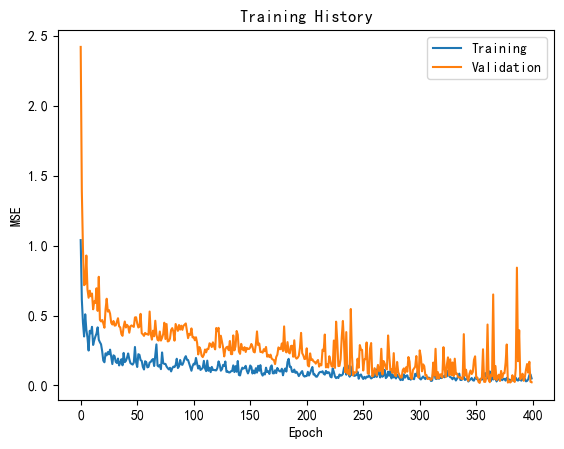

In [50]:
#构建模型
MSE_model = Sequential()
MSE_model.add(Dense(256, activation = 'relu', input_dim = len(X.columns)))
MSE_model.add(Dense(128))
MSE_model.add(BatchNormalization())
MSE_model.add(Activation('relu'))
MSE_model.add(Dense(128))
MSE_model.add(BatchNormalization())
MSE_model.add(Activation('relu'))
MSE_model.add(Dense(128))
MSE_model.add(BatchNormalization())
MSE_model.add(Activation('relu'))
MSE_model.add(Dense(1, activation = 'linear'))
MSE_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_percentage_error'])
MSE_model.summary()

# 获取训练历史以绘制训练过程

history = MSE_model.fit(x_train_scaled, y_train_scaled, epochs=400,validation_data=(x_val,y_val), verbose = False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Training','Validation'])
plt.show()

In [51]:
pred = scaler2.inverse_transform(MSE_model.predict(scaler.transform(x_test)))
real = y_test
pred_df = pd.DataFrame(data=pred)
real_df = pd.DataFrame(data=real)
real_df.reset_index(inplace=True)
real_df.drop(columns = ['index'],inplace = True)
print('The Mean Absolute Percentage Error is:',sum(abs(real_df['相对贴近度'] - pred_df[0]))/real_df['相对贴近度'].sum())

9/9 [==============================] - 0s 2ms/step
The Mean Absolute Percentage Error is: 0.10342261560822444


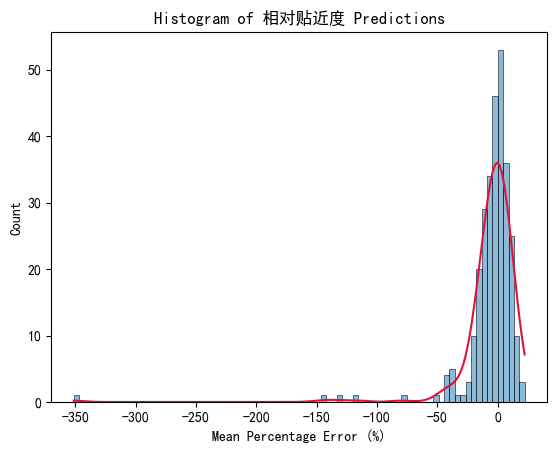

In [52]:
ax = sns.histplot((real_df['相对贴近度'] - pred_df[0])/real_df['相对贴近度']*100,kde=True)
ax.lines[0].set_color('crimson')
plt.title('Histogram of 相对贴近度 Predictions')
plt.xlabel('Mean Percentage Error (%)')
plt.show()

In [25]:
import sklearn.cluster as cluster

# 检查特征列是否重复（重要！）
features = [
    '相对贴近度',
    'currentRatio',
    'quickRatio',
    'cashRatio',
    'YOYLiability',  # 这里原代码重复了两次，已修正
    'liabilityToAsset'  # 假设这是正确的特征名
]

# 初始化模型（添加n_init=10）
kmeans = cluster.KMeans(
    n_clusters=18,
    init='k-means++',
    n_init=10  # 显式设置初始化次数
)

# 训练模型（只需执行一次）
kmeans.fit(df[features])

# 保存聚类结果
df['cluster_label'] = kmeans.labels_

num GPUs available: 0
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 256)               4864      
                                                                 
 dense_11 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_5 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               16512     
                                                                 
 activation_7 (Activation)   (None, 128)               0         
                                

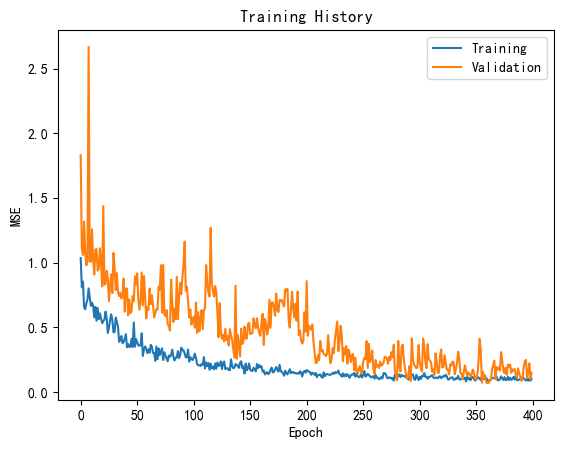

In [29]:
import tensorflow as tf
print("num GPUs available:", len(tf.config.experimental.list_physical_devices("GPU")))
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# 初始化标量器
scaler = RobustScaler()
scaler2 = StandardScaler()
# 执行独热编码

X = df.drop(columns = ['相对贴近度','分类','pubDate','statDate','code','netProfit','liqaShare','totalShare'])
y = df['相对贴近度']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
y_train_df = pd.DataFrame(data=y_train)
# 对数据进行缩放处理

x_train_scaled = scaler.fit_transform(x_train)
y_train_scaled = scaler2.fit_transform(y_train_df)

x_train, x_val, y_train, y_val = train_test_split(x_train_scaled,y_train_scaled, test_size = 0.2)
MSE_model2 = Sequential()
MSE_model2.add(Dense(256, activation = 'relu', input_dim = len(X.columns)))
MSE_model2.add(Dense(128))
MSE_model2.add(BatchNormalization())
MSE_model2.add(Activation('relu'))
MSE_model2.add(Dense(128))
MSE_model2.add(Activation('relu'))
MSE_model2.add(Dense(128))
MSE_model2.add(BatchNormalization())
MSE_model2.add(Activation('relu'))
MSE_model2.add(Dense(1, activation = 'linear'))
MSE_model2.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_percentage_error'])
MSE_model2.summary()

history = MSE_model2.fit(x_train_scaled, y_train_scaled, epochs=400,validation_data=(x_val,y_val), verbose = False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Training','Validation'])
plt.show()

9/9 [==============================] - 0s 2ms/step
The Mean Absolute Percentage Error When Trained with Cluster Labels is: 0.2836487766641892


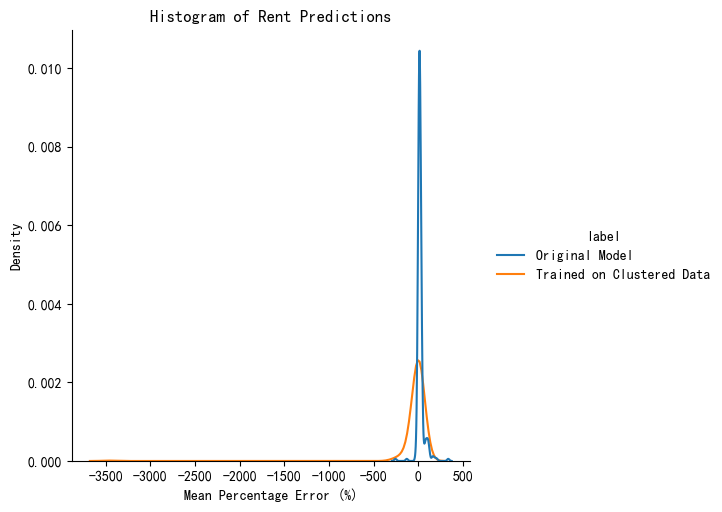

In [30]:
pred2 = scaler2.inverse_transform(MSE_model2.predict(scaler.transform(x_test)))
real2 = y_test
pred_df2 = pd.DataFrame(data=pred2)
real_df2 = pd.DataFrame(data=real2)
real_df2.reset_index(inplace=True)
real_df2.drop(columns = ['index'],inplace = True)
print('The Mean Absolute Percentage Error When Trained with Cluster Labels is:',sum(abs(real_df2['相对贴近度'] - pred_df2[0]))/real_df2['相对贴近度'].sum())

df1 = pd.DataFrame(data=(real_df['相对贴近度'] - pred_df[0])/real_df['相对贴近度']*100)
df2 =  pd.DataFrame((real_df2['相对贴近度'] - pred_df2[0])/real_df2['相对贴近度']*100)
df1['label'] = np.zeros(len(real_df))
df2['label'] = np.ones(len(real_df2))
frames = [df1, df2]
df_frames = pd.concat(frames,ignore_index=True)
df_frames['label'].replace(0,'Original Model', inplace = True)
df_frames['label'].replace(1,'Trained on Clustered Data', inplace = True)

sns.displot(data=df_frames,x=0,hue='label',kind='kde')
plt.title('Histogram of Rent Predictions')
plt.xlabel('Mean Percentage Error (%)')
plt.show()

In [158]:
df

,code,pubDate,statDate,currentRatio,quickRatio,cashRatio,YOYLiability,liabilityToAsset,assetToEquity,YOYEquity,...,AssetTurnRatio,roeAvg,npMargin,netProfit,epsTTM,totalShare,liqaShare,相对贴近度,分类,cluster_label
3,sh.600000,2011-03-30,2010-12-31,1.744580,1.210160,0.633894,0.330304,0.943744,17.775904,0.810020,...,0.026143,0.200862,0.384681,1.917859e+10,1.336501,1.434882e+10,1.147906e+10,0.042557,差,0
7,sh.600000,2012-03-16,2011-12-31,1.744580,1.210160,0.633894,0.225817,0.944298,17.952680,0.210534,...,0.027857,0.200715,0.402769,2.735511e+10,1.462783,1.865347e+10,1.492278e+10,0.053992,差,0
11,sh.600000,2013-03-14,2012-12-31,1.744580,1.210160,0.633894,0.169969,0.942888,17.509320,0.192135,...,0.028455,0.209481,0.413625,3.431100e+10,1.832688,1.865347e+10,1.492278e+10,0.053993,差,0
15,sh.600000,2014-03-20,2013-12-31,1.744580,1.210160,0.633894,0.170884,0.943690,17.758907,0.151428,...,0.029305,0.214323,0.411938,4.120000e+10,2.193801,1.865347e+10,1.492278e+10,0.054012,差,0
19,sh.600000,2015-03-19,2014-12-31,1.744580,1.210160,0.633894,0.132380,0.937252,15.936814,0.272998,...,0.031280,0.202461,0.384475,4.736000e+10,2.521032,1.865347e+10,1.492278e+10,0.053986,差,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,sh.600117,2021-04-28,2020-12-31,0.508480,0.327213,0.125361,-0.035947,0.758310,4.137533,0.057494,...,0.485621,0.041970,0.010746,1.082746e+08,0.056584,1.045118e+09,1.045118e+09,0.010162,很差,5
5582,sh.600117,2022-04-30,2021-12-31,0.547786,0.382943,0.080600,0.051655,0.881953,8.471187,-0.805987,...,0.626938,-1.328309,-0.218077,-2.666884e+09,-1.099021,1.045118e+09,1.045118e+09,0.011963,很差,5
5586,sh.600117,2023-04-29,2022-12-31,0.434834,0.295190,0.084149,-0.007701,0.966484,29.836459,-3.915592,...,0.439373,0.008119,-0.209574,-1.625718e+09,-1.101002,1.045118e+09,1.045118e+09,0.011568,很差,5
5590,sh.600117,2024-03-20,2023-12-31,1.008720,0.585776,0.217713,-0.611256,0.450685,1.820450,7.260885,...,0.320942,0.747730,0.253611,1.252610e+09,0.518000,3.255115e+09,3.255115e+09,0.013059,很差,15


In [159]:

data_pivot = pd.pivot_table(data=df[[ '相对贴近度','currentRatio','quickRatio','cashRatio','YOYLiability', 'liabilityToAsset','code']],index='code')
data_pivot

,YOYLiability,cashRatio,currentRatio,liabilityToAsset,quickRatio,相对贴近度
code,,,,,,
sh.600000,0.126343,0.633894,1.744580,0.869384,1.210160,0.074240
sh.600004,0.081419,0.500183,0.788251,0.289135,0.771308,0.014694
sh.600005,-0.006818,0.061796,0.554573,0.641927,0.309683,0.036720
sh.600006,0.017896,0.434016,1.317303,0.557367,1.122151,0.014294
sh.600007,-0.032503,0.902385,1.114403,0.385283,1.093272,0.018639
...,...,...,...,...,...,...
sh.600113,0.128054,0.651748,1.906840,0.293921,1.059636,0.014021
sh.600114,0.193102,0.318185,1.603504,0.373332,1.180418,0.013614
sh.600115,0.080872,0.082488,0.259050,0.749690,0.230762,0.048413


C:\Users\hp\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[]

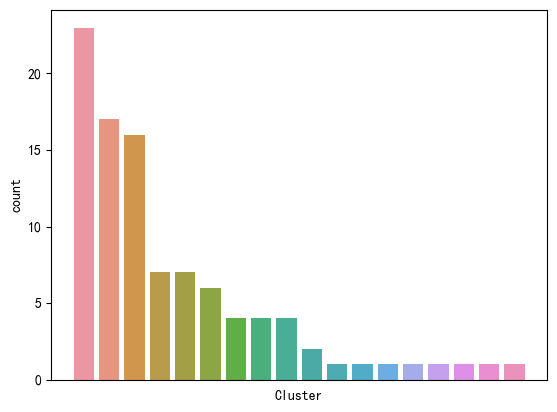

In [160]:
scaler3 = RobustScaler()
data_pivot_scaled = scaler3.fit_transform(data_pivot)
kmeans2 = cluster.KMeans(n_clusters = 18, init = 'k-means++')
kmeans2 = kmeans2.fit(data_pivot_scaled)

data_pivot['Cluster'] = kmeans2.labels_

sns.countplot(data=data_pivot,x='Cluster',order = data_pivot['Cluster'].value_counts().index)
plt.xticks([])
plt.plot()

In [161]:
df

,code,pubDate,statDate,currentRatio,quickRatio,cashRatio,YOYLiability,liabilityToAsset,assetToEquity,YOYEquity,...,AssetTurnRatio,roeAvg,npMargin,netProfit,epsTTM,totalShare,liqaShare,相对贴近度,分类,cluster_label
3,sh.600000,2011-03-30,2010-12-31,1.744580,1.210160,0.633894,0.330304,0.943744,17.775904,0.810020,...,0.026143,0.200862,0.384681,1.917859e+10,1.336501,1.434882e+10,1.147906e+10,0.042557,差,0
7,sh.600000,2012-03-16,2011-12-31,1.744580,1.210160,0.633894,0.225817,0.944298,17.952680,0.210534,...,0.027857,0.200715,0.402769,2.735511e+10,1.462783,1.865347e+10,1.492278e+10,0.053992,差,0
11,sh.600000,2013-03-14,2012-12-31,1.744580,1.210160,0.633894,0.169969,0.942888,17.509320,0.192135,...,0.028455,0.209481,0.413625,3.431100e+10,1.832688,1.865347e+10,1.492278e+10,0.053993,差,0
15,sh.600000,2014-03-20,2013-12-31,1.744580,1.210160,0.633894,0.170884,0.943690,17.758907,0.151428,...,0.029305,0.214323,0.411938,4.120000e+10,2.193801,1.865347e+10,1.492278e+10,0.054012,差,0
19,sh.600000,2015-03-19,2014-12-31,1.744580,1.210160,0.633894,0.132380,0.937252,15.936814,0.272998,...,0.031280,0.202461,0.384475,4.736000e+10,2.521032,1.865347e+10,1.492278e+10,0.053986,差,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5578,sh.600117,2021-04-28,2020-12-31,0.508480,0.327213,0.125361,-0.035947,0.758310,4.137533,0.057494,...,0.485621,0.041970,0.010746,1.082746e+08,0.056584,1.045118e+09,1.045118e+09,0.010162,很差,5
5582,sh.600117,2022-04-30,2021-12-31,0.547786,0.382943,0.080600,0.051655,0.881953,8.471187,-0.805987,...,0.626938,-1.328309,-0.218077,-2.666884e+09,-1.099021,1.045118e+09,1.045118e+09,0.011963,很差,5
5586,sh.600117,2023-04-29,2022-12-31,0.434834,0.295190,0.084149,-0.007701,0.966484,29.836459,-3.915592,...,0.439373,0.008119,-0.209574,-1.625718e+09,-1.101002,1.045118e+09,1.045118e+09,0.011568,很差,5
5590,sh.600117,2024-03-20,2023-12-31,1.008720,0.585776,0.217713,-0.611256,0.450685,1.820450,7.260885,...,0.320942,0.747730,0.253611,1.252610e+09,0.518000,3.255115e+09,3.255115e+09,0.013059,很差,15


Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_75 (Dense)            (None, 256)               5120      
                                                                 
 dense_76 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_40 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 activation_45 (Activation)  (None, 128)               0         
                                                                 
 dense_77 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_41 (Bat  (None, 128)              512       
 chNormalization)                                    

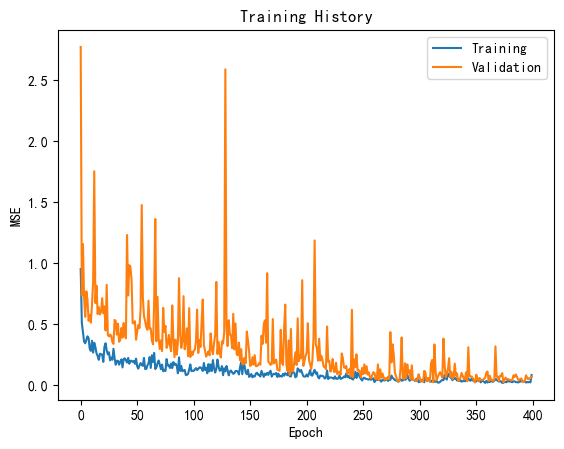

In [162]:


# # 对连续变量进行标准化（如相对贴近度、currentRatio等）
# continuous_cols = ['相对贴近度', 'currentRatio', 'quickRatio', 'cashRatio', 'YOYLiability', 'liabilityToAsset']
# scaler_cont = StandardScaler()
# df[continuous_cols] = scaler_cont.fit_transform(df[continuous_cols])




X = df.drop(columns = ['分类','pubDate','statDate','code','netProfit','liqaShare','totalShare'])
y = df['相对贴近度']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
y_train_df = pd.DataFrame(data=y_train)



x_train_scaled = scaler.fit_transform(x_train)
y_train_scaled = scaler2.fit_transform(y_train_df)

x_train, x_val, y_train, y_val = train_test_split(x_train_scaled,y_train_scaled, test_size = 0.2)



MSE_model3 = Sequential()
MSE_model3.add(Dense(256, activation = 'relu', input_dim = len(X.columns)))
MSE_model3.add(Dense(128))
MSE_model3.add(BatchNormalization())
MSE_model3.add(Activation('relu'))
MSE_model3.add(Dense(128))
MSE_model3.add(BatchNormalization())
MSE_model3.add(Activation('relu'))
MSE_model3.add(Dense(128))
MSE_model3.add(BatchNormalization())
MSE_model3.add(Activation('relu'))
MSE_model3.add(Dense(1, activation = 'linear'))
MSE_model3.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_percentage_error'])
MSE_model3.summary()


history = MSE_model3.fit(x_train_scaled, y_train_scaled, epochs=400,validation_data=(x_val,y_val), verbose = False)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Training','Validation'])
plt.show()

In [163]:
pred3 = scaler2.inverse_transform(MSE_model3.predict(scaler.transform(x_test)))
real3 = y_test
pred_df3 = pd.DataFrame(data=pred3)
real_df3 = pd.DataFrame(data=real3)
real_df3.reset_index(inplace=True)
real_df3.drop(columns = ['index'],inplace = True)
print('The Mean Absolute Percentage Error is:',sum(abs(real_df3['相对贴近度'] - pred_df3[0]))/real_df3['相对贴近度'].sum())

9/9 [==============================] - 0s 2ms/step
The Mean Absolute Percentage Error is: 0.30897769630285093


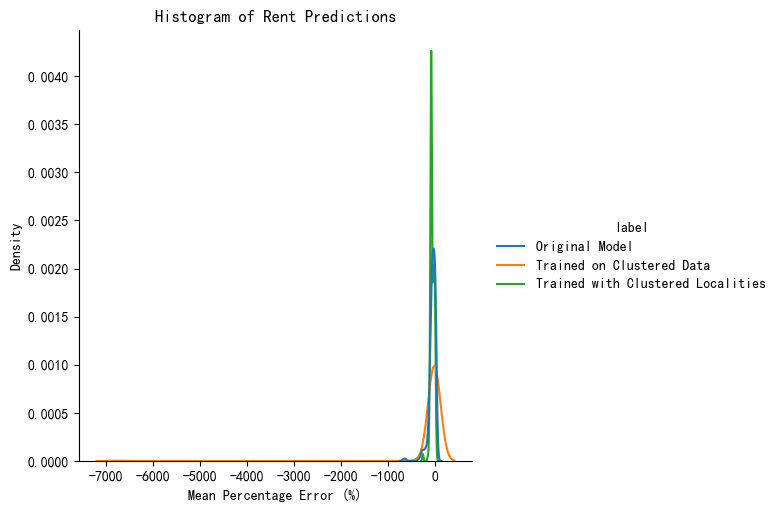

In [164]:
df1 = pd.DataFrame(data=(real_df['相对贴近度'] - pred_df[0])/real_df['相对贴近度']*100)
df2 =  pd.DataFrame((real_df2['相对贴近度'] - pred_df2[0])/real_df2['相对贴近度']*100)
df3 =  pd.DataFrame((real_df3['相对贴近度'] - pred_df3[0])/real_df3['相对贴近度']*100)
df1['label'] = np.zeros(len(real_df))
df2['label'] = np.ones(len(real_df2))
df3['label'] = np.ones(len(real_df2))*2
frames = [df1, df2, df3]
df_Histogram = pd.concat(frames,ignore_index=True)
df_Histogram['label'].replace(0,'Original Model', inplace = True)
df_Histogram['label'].replace(1,'Trained on Clustered Data', inplace = True)
df_Histogram['label'].replace(2,'Trained with Clustered Localities', inplace = True)

sns.displot(data=df_Histogram,x=0,hue='label',kind='kde')
plt.title('Histogram of Rent Predictions')
plt.xlabel('Mean Percentage Error (%)')
plt.show()

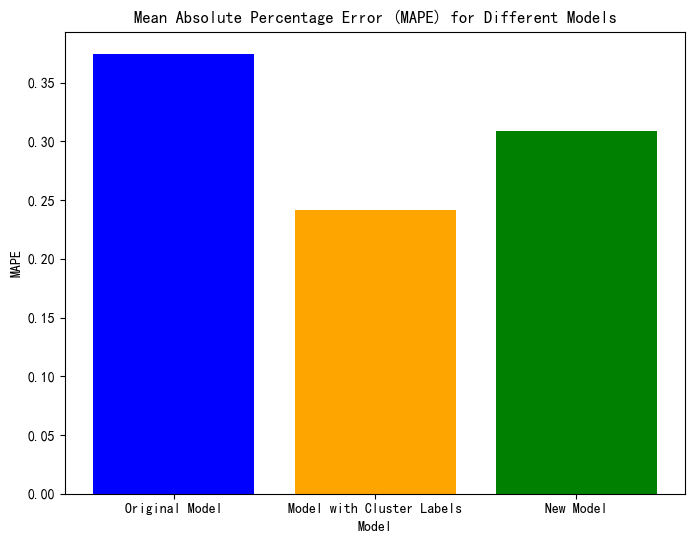

In [166]:
import matplotlib.pyplot as plt


models = ['Original Model', 'Model with Cluster Labels', 'New Model']


mape_values = [0.37466687949730954, 0.24159305799075764, 0.30897769630285093]


plt.figure(figsize=(8, 6))
plt.bar(models, mape_values, color=['blue', 'orange', 'green'])


plt.title('Mean Absolute Percentage Error (MAPE) for Different Models')
plt.xlabel('Model')
plt.ylabel('MAPE')


plt.show()
